## Семинар по линрегу. 192

In [3]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('../data/house_prices.csv')

In [34]:
df[['price', 'area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


<AxesSubplot:>

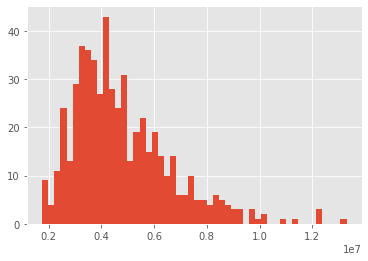

In [35]:
df['price'].hist(bins=50)

In [36]:
df['log_price'] = np.log(df['price'])

In [37]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,14.414347
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,14.384879
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,14.375126
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,14.375126


In [38]:
# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

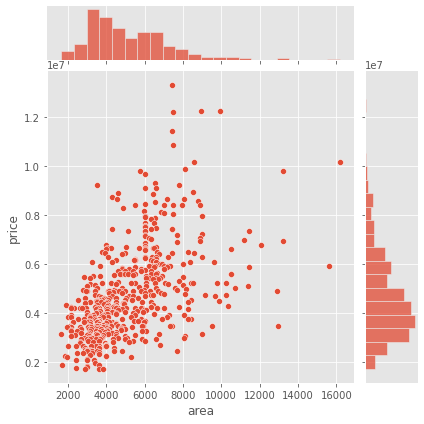

In [39]:
# scatter plot – диаграмма рассеивания

sns.jointplot(x='area', y='price', data=df, kind='scatter')

In [49]:
np.quantile(df.price, 0.99)

10541999.999999963

In [50]:
df[df['price'] > np.quantile(df.price, 0.99)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,16.199676


In [53]:
df['heating_and_bedrooms'] = df['hotwaterheating'] * df['bedrooms']

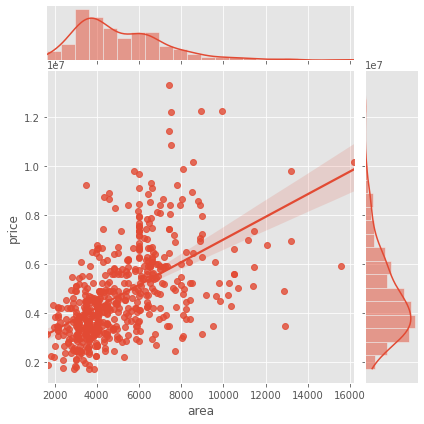

In [40]:
sns.jointplot(x='area', y='price', data=df, kind='reg')

### Подготовим данные для регрессии

In [41]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

d = {'yes': 1, 'no': 0}
df[yes_no_cols] = df[yes_no_cols].apply(lambda x: x.map(d))

In [43]:
df.drop('furnishingstatus', axis=1, inplace=True)

In [44]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,14.414347
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,14.384879
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,14.375126
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,14.375126


one-hot encoding

In [20]:
df_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)


df = pd.concat([df, df_dummies], axis=1)

In [21]:
df = df.drop('furnishingstatus', axis=1)

### Линейная регрессия

In [22]:
df.columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semifurnished', 'unfurnished', 'log_price']

In [23]:
df['area_2'] = df['area']**2

In [54]:
formula = 'log_price ~ area + bedrooms + bathrooms + stories + mainroad' \
          '+ guestroom + basement + hotwaterheating + airconditioning' \
          '+ parking + prefarea + heating_and_bedrooms'


from statsmodels.formula.api import ols

# ols - ordinary least squares (обычный метод наименьших квадратов)

model = ols(
    formula,
    data=df
).fit()

In [55]:
results_summary = model.summary(alpha=0.01)

In [56]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     93.31
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          2.23e-122
Time:                        16:33:20   Log-Likelihood:                 74.595
No. Observations:                 545   AIC:                            -123.2
Df Residuals:                     532   BIC:                            -67.28
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.005      0.995]
----------------------------------------------------------------------------------------
Intercept               14.2863      0.048    297.322      0.000      14.162      14.411
area                  5.065e-05   4.85e-06     10.439      0.000    3.81e-05    6.32e-05
bedrooms                 0.0301      0.015      2.039      0.042      -0.008       0.068
bathrooms                0.1658      0.021      7.998      0.000       0.112       0.219
stories                  0.0923      0.013      7.191      0.000       0.059       0.125
mainroad                 0.1314      0.028      4.637      0.000       0.058       0.205
guestroom                0.0734      0.026      2.787      0.006       0.005       0.141
basement                 0.0986      0.022      4.483      0.000       0.042       0.155
hotwaterheating         -0.0556      0.174     -0.319      0.750      -0.506       0.395
airconditioning          0.1782      0.022      8.252      0.000       0.122       0.234
parking                  0.0511      0.012      4.390      0.000       0.021       0.081
prefarea                 0.1285      0.023      5.554      0.000       0.069       0.188
heating_and_bedrooms     0.0755      0.054      1.389      0.165      -0.065       0.216
==============================================================================
Omnibus:                        7.416   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.205
Skew:                          -0.195   Prob(JB):                       0.0165
Kurtosis:                       3.457   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
results_as_html = results_summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,-346800.0000,329000.000,-1.055,0.292,-1200000.000,503000.000
area,405.9543,85.198,4.765,0.000,185.707,626.202
bedrooms,118800.0000,72400.000,1.641,0.101,-68400.000,306000.000
bathrooms,984200.0000,103000.000,9.546,0.000,718000.000,1250000.000
stories,443100.0000,64100.000,6.910,0.000,277000.000,609000.000
mainroad,378600.0000,143000.000,2.639,0.009,7780.665,749000.000
guestroom,253900.0000,133000.000,1.903,0.058,-91100.000,599000.000
basement,357400.0000,110000.000,3.248,0.001,72900.000,642000.000
hotwaterheating,859800.0000,223000.000,3.863,0.000,284000.000,1440000.000
airconditioning,832700.0000,109000.000,7.620,0.000,550000.000,1120000.000


In [ ]:
0.292 > 0.01 => коэффициент незначим, нулевая гипотеза не отверглась, то есть коэффициент на самом деле равен 0

